29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(55000, 28, 28)
uint8


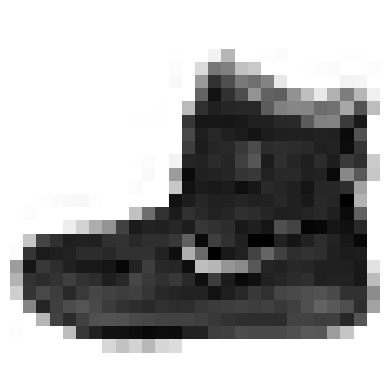

[9 0 0 ... 9 0 2]
Ankle boot


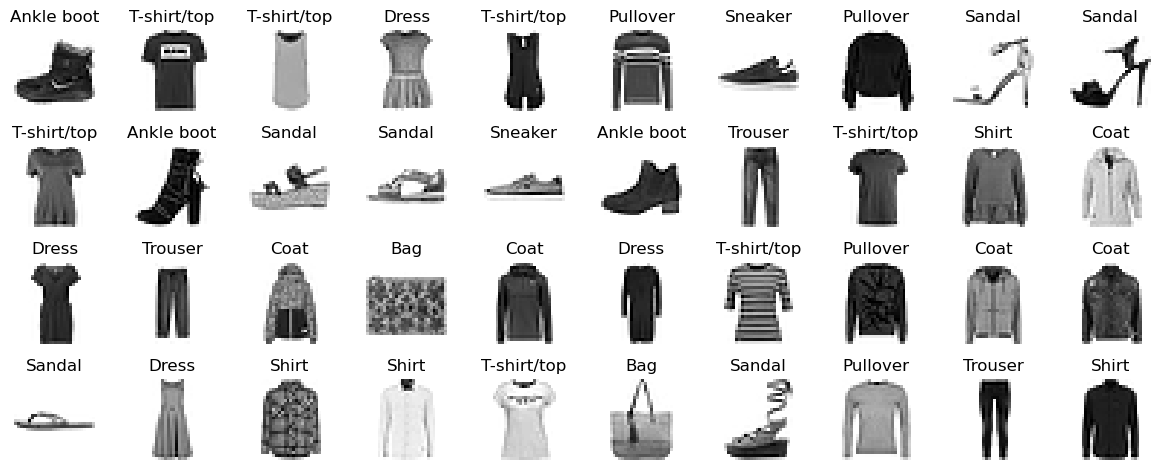

C:\Users\shkwon\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

[<Flatten name=flatten, built=True>, <Dense name=dense, built=True>, <Dense name=dense_1, built=True>, <Dense name=dense_2, built=True>]
dense
True
[[ 0.05062385 -0.06511511  0.02165239 ...  0.01073191  0.04039617
  -0.03718963]
 [-0.04284103  0.05994211 -0.03453479 ... -0.02311492  0.06242971
  -0.01776187]
 [ 0.02492984 -0.06565727 -0.06047886 ...  0.06193721  0.01887161
  -0.01642976]
 ...
 [-0.01129311  0.00941028  0.02183892 ...  0.06079982 -0.05403289
  -0.02728921]
 [ 0.01483364 -0.04743615 -0.03014193 ... -0.02910775 -0.01392065
   0.015477  ]
 [ 0.06952181  0.01090661  0.0565808  ...  0.0212023  -0.02357137
   0.01523808]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

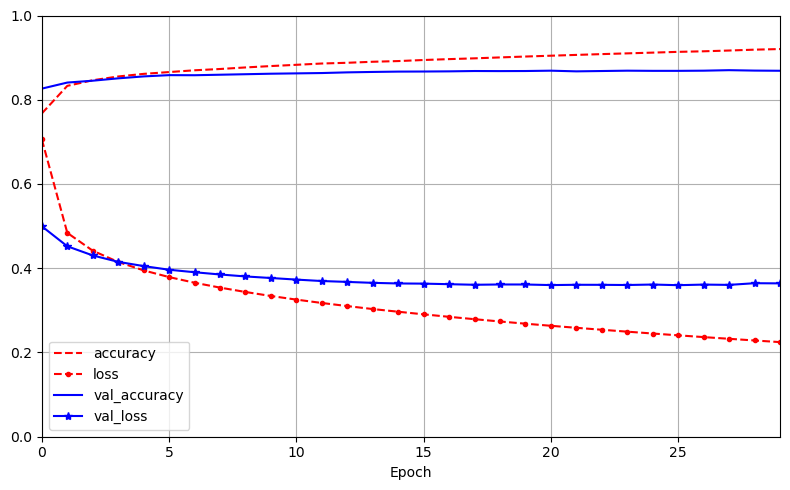

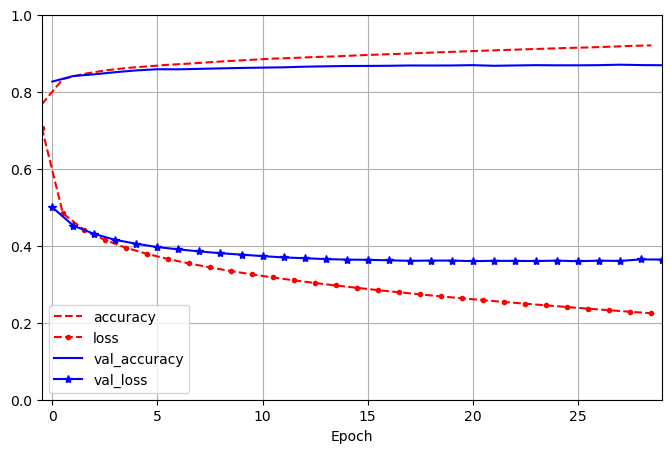

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8692 - loss: 0.3820
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
[9 2 1]


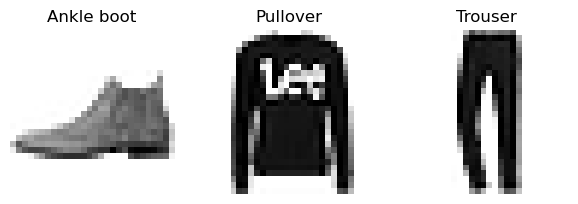

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

print(X_train.shape)
print(X_train.dtype)

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

# extra code
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

print(y_train)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(class_names[y_train[0]])

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# extra code – clear the session to reset the name counters
#tf.keras.backend.clear_session()
#tf.random.set_seed(42)

#model = tf.keras.Sequential([
#    tf.keras.layers.Flatten(input_shape=[28, 28]),
#    tf.keras.layers.Dense(300, activation="relu"),
#    tf.keras.layers.Dense(100, activation="relu"),
#    tf.keras.layers.Dense(10, activation="softmax")
#])

model.summary()
# extra code – another way to display the model's architecture
#tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

print(model.layers)

hidden1 = model.layers[1]
print(hidden1.name)
print(model.get_layer('dense') is hidden1)

weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# extra code – this cell is equivalent to the previous cell
#model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
#              optimizer=tf.keras.optimizers.SGD(),
#              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

# extra code – shows how to convert class ids to one-hot vectors
print(tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10))

# extra code – shows how to convert one-hot vectors to class ids
#np.argmax(
#    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
#     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
#     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
#    axis=1
#)

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

print(history.params)

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])

plt.legend(loc="lower left")  # extra code
save_fig("keras_learning_curves_plot")  # extra code
plt.show()

# extra code – shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

y_pred = y_proba.argmax(axis=-1)
print(y_pred)
print(np.array(class_names)[y_pred])

y_new = y_test[:3]
print(y_new)

# extra code – this cell generates and saves Figure 10–12
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()